In [2]:
import pandas as pd
import numpy as np

In [4]:
 Social_data=pd.read_csv('/content/Social_Network_Ads.csv')

In [42]:
Social_data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
Social_data.columns


Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [ ]:
Social_data.drop(labels=['User ID', 'Gender'], axis=1, inplace=True)


In [ ]:
Social_data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [25]:
x = np.array(Social_data[["Age", "EstimatedSalary"]])
y = np.array(Social_data[["Purchased"]])

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train,x_test,y_train,y_test,=train_test_split(x,y,random_state=42,test_size=.25)

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
log_reg=LogisticRegression()

In [30]:
log_reg.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [31]:
y_log_pred=log_reg.predict(x_test)

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

confusion_matrix(y_test,y_log_pred)

array([[63,  0],
       [37,  0]])

In [33]:
print('Accuracy :',accuracy_score(y_test,y_log_pred))


Accuracy : 0.63


In [ ]:
# KNN

In [34]:
from  sklearn.neighbors import KNeighborsClassifier

metric_k = []

neighbors = np.arange(3, 15)

In [35]:
for k in neighbors:
  classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
  classifier.fit(x_train,y_train)
  y_pred_knn=classifier.predict(x_test)
  accuracy=accuracy_score(y_test,y_pred_knn)
  metric_k.append(accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

In [36]:
import matplotlib.pyplot as plt


Text(0, 0.5, 'accuracy')

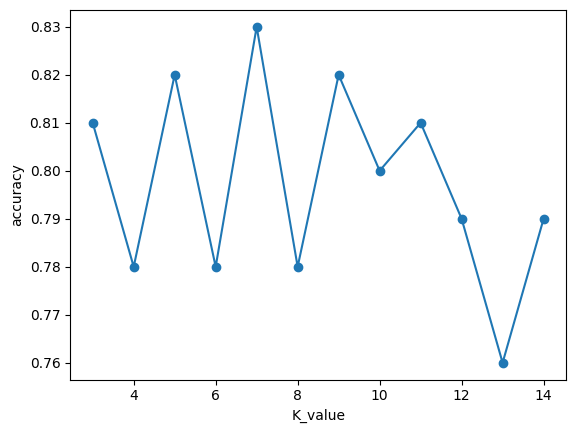

In [37]:

plt.plot(neighbors,metric_k,'o-')
plt.xlabel('K_value')
plt.ylabel('accuracy')

In [38]:
confusion_matrix(y_test,y_pred_knn)

array([[60,  3],
       [18, 19]])

In [39]:
print('Accuracy :',accuracy_score(y_test,y_pred_knn))

Accuracy : 0.79


In [ ]:
# SVC model

In [40]:
from sklearn.svm import SVC
sv_cl=SVC(kernel='linear')
sv_cl.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [41]:
y_pred=sv_cl.predict(x_test)

In [43]:
print(confusion_matrix(y_test,y_pred))

[[59  4]
 [10 27]]


In [44]:
print('Accuracy :',accuracy_score(y_test,y_pred))

Accuracy : 0.86


In [45]:
print('Accuracy :',accuracy_score(y_test,y_pred))


Accuracy : 0.86


In [ ]:
# Decision Tree

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
dt_clf = DecisionTreeClassifier()


In [49]:
dt_clf.fit(x_train, y_train)


DecisionTreeClassifier()

In [50]:
y_pred=dt_clf.predict(x_test)

In [51]:
print(confusion_matrix(y_test,y_pred))

[[55  8]
 [ 8 29]]


In [52]:
print('Accuracy :',accuracy_score(y_test,y_pred))


Accuracy : 0.84


In [ ]:
# radom forest

In [58]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier


In [59]:
rf_clf = RandomForestClassifier(n_estimators=20, max_depth=20, criterion='entropy', min_samples_split=3)
rf_clf.fit(x_train, y_train)

<ipython-input-59-356bc65f58e5>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf.fit(x_train, y_train)


RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_split=3,
                       n_estimators=20)

In [70]:
print(confusion_matrix(y_test,y_pred))

[[57  6]
 [ 2 35]]


In [62]:
y_pred = rf_clf.predict(x_test)


In [63]:
print('Accuracy :',accuracy_score(y_test,y_pred))


Accuracy : 0.92


In [64]:
rf_clf = RandomForestClassifier(n_estimators=20, max_depth=20, criterion='entropy', min_samples_split=3)
rf_clf.fit(x_train, y_train)

<ipython-input-64-356bc65f58e5>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf.fit(x_train, y_train)


RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_split=3,
                       n_estimators=20)

In [65]:
print('Accuracy :',accuracy_score(y_test,y_pred))


Accuracy : 0.92


In [ ]:
# best model is RandomForestClassifier model


In [74]:
prediction=rf_clf.predict([[ 2,35]])


In [75]:
target=prediction[0]

In [76]:

if prediction[0]==1:
 print("purchased")
else:
  print("not purchased")


not purchased


In [81]:
# pickle the trained model

import pickle
with open('model.pkl','wb') as model_file:
  pickle.dump(rf_clf,model_file)